# Logistic Regression - Pytorch (From Scratch)

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu' # will select 'cuda' is gpu is available otherwise 'cpu'
print('Chosen device:', device)

Chosen device: cuda


## Creating the custom dataset.

`torch.normal` gives a tensor sampled from a normal distribution with mean and variance provided by you

In [2]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def function(x):
    linear = 2 * x[:, 0] - 0.2 * x[:, 1] + 2.4
    return torch.where(linear > 0, torch.ones_like(linear), torch.zeros_like(linear))

train_x = torch.normal(0, 5, [num_examples, num_inputs])
train_y = function(train_x)

test_x = torch.normal(0, 5, [1000, num_inputs])
test_y= function(test_x)

print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

print('train_y.max():', train_y.max())
print('train_y.min():', train_y.min())

torch.Size([10000, 2])
torch.Size([10000])
torch.Size([1000, 2])
torch.Size([1000])
train_y.max(): tensor(1.)
train_y.min(): tensor(0.)


## Visualizing training dataset

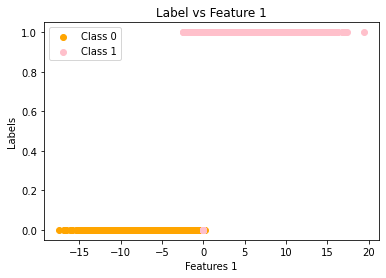

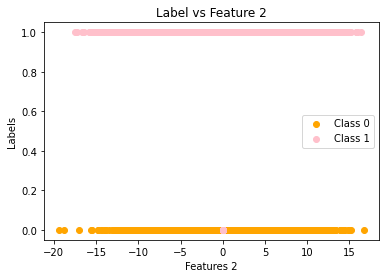

In [3]:
plt.scatter((train_x[:, 0] * (train_y == 0).float()), (train_y * (train_y == 0).float()), c = 'orange', label = 'Class 0')
plt.scatter((train_x[:, 0] * (train_y == 1).float()), (train_y * (train_y == 1).float()), c = 'pink', label = 'Class 1')
plt.title('Label vs Feature 1')
plt.xlabel('Features 1')
plt.ylabel('Labels')
plt.legend()
plt.show()

plt.scatter((train_x[:, 1] * (train_y == 0).float()), (train_y * (train_y == 0).float()), c = 'orange', label = 'Class 0')
plt.scatter((train_x[:, 1] * (train_y == 1).float()), (train_y * (train_y == 1).float()), c = 'pink', label = 'Class 1')
plt.title('Label vs Feature 2')
plt.xlabel('Features 2')
plt.ylabel('Labels')
plt.legend()
plt.show()

## Visualizing testing dataset

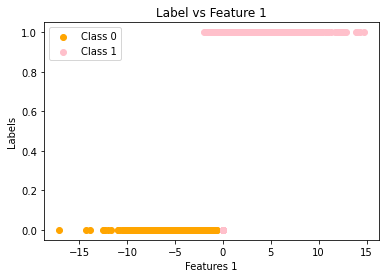

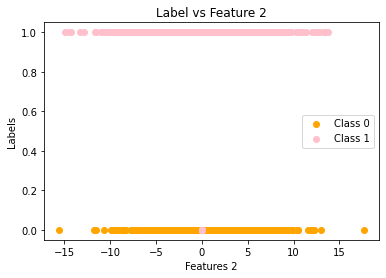

In [4]:
plt.scatter((test_x[:, 0] * (test_y == 0).float()), (test_y * (test_y == 0).float()), c = 'orange', label = 'Class 0')
plt.scatter((test_x[:, 0] * (test_y == 1).float()), (test_y * (test_y == 1).float()), c = 'pink', label = 'Class 1')
plt.title('Label vs Feature 1')
plt.xlabel('Features 1')
plt.ylabel('Labels')
plt.legend()
plt.show()

plt.scatter((test_x[:, 1] * (test_y == 0).float()), (test_y * (test_y == 0).float()), c = 'orange', label = 'Class 0')
plt.scatter((test_x[:, 1] * (test_y == 1).float()), (test_y * (test_y == 1).float()), c = 'pink', label = 'Class 1')
plt.title('Label vs Feature 2')
plt.xlabel('Features 2')
plt.ylabel('Labels')
plt.legend()
plt.show()

## Defining dataloader

In [5]:
batch_size = 16
dataset = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_x, train_y), batch_size = batch_size, shuffle = True)

print('No of batches for batch size {} is {}'.format(batch_size, len(dataset)))

No of batches for batch size 16 is 625


First let's define the logistic or sigmoid function

## Logistic or Sigmoid function

In [6]:
def sigmoid(linear):
    return 1/(1 + torch.exp(-linear))

## Visualizing sigmoid function

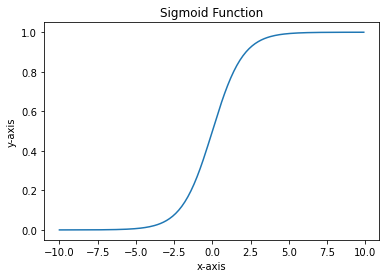

In [7]:
x = torch.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Sigmoid Function')
plt.show()

## Building Logistic Regression Model

In pytorch, parameters can be declared using `torch.nn.Parameter`.

In [13]:
weights = nn.Parameter(torch.randn(num_inputs, num_outputs, device = device))
bias = nn.Parameter(torch.randn(num_outputs, device = device))
params = [weights, bias]

print(weights)
print(bias)

def logisticregression(inputs):
    return sigmoid(torch.mm(inputs, weights) + bias) # mm stands for matrix multiplication

Parameter containing:
tensor([[-1.4294],
        [ 0.7953]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([1.0671], device='cuda:0', requires_grad=True)


## Defining our objective function

$\text{Binary cross entropy} = -\large\frac{1}{n}\sum_{i = 1}^{n}\left(y_{i} * \log{\hat{y}_{i}} + (1 - y_{i}) * \log\left(1 - {\hat{y}_{i}}\right)\right)$

In [14]:
def binarycrossentropy(predictions, labels):
    return -torch.mean((labels * torch.log(predictions + 1e-10)) +((1 - labels) * torch.log(1 - predictions + 1e-10)))
# adding 1e-10 to prevent nan

## Defining our parameters optimizer(Gradient Decent)

In [15]:
def sgd(params, lr):
    with torch.no_grad():
        # doing all the parameter updated inside torch.no_grad, because we don't want to record any computation of sgd for backward pass....
        for param in params:
            param -= lr * param.grad
            param.grad.zero_() # zeroing the gradient of after each update so that it would't affect the gradients of for the next update

In [16]:
epochs = 20
num_batches = len(dataset)
learning_rate = .0001
losses = []

for epoch in range(epochs):
    cumulative_loss = 0
    for features, labels in dataset:
        features = features.to(device) # .to(device) put features stored in cpu to device(which we have initialized above)
        labels = labels.to(device).reshape((-1, 1)) # .to(device) put labels stored in cpu to device(which we have initialized above)
        
        output = logisticregression(features)
        loss = binarycrossentropy(output, labels)
        loss.backward()

        sgd(params, learning_rate)
        cumulative_loss += loss

    print('Epoch: {} Loss: {}'.format(epoch, cumulative_loss/num_batches))
    losses.append(cumulative_loss/num_batches)

Epoch: 0 Loss: 4.099689960479736
Epoch: 1 Loss: 2.824803352355957
Epoch: 2 Loss: 2.068925619125366
Epoch: 3 Loss: 1.4314980506896973
Epoch: 4 Loss: 0.9669675827026367
Epoch: 5 Loss: 0.6815086007118225
Epoch: 6 Loss: 0.5200092792510986
Epoch: 7 Loss: 0.4262051284313202
Epoch: 8 Loss: 0.3675357699394226
Epoch: 9 Loss: 0.3278528153896332
Epoch: 10 Loss: 0.2992136478424072
Epoch: 11 Loss: 0.27750077843666077
Epoch: 12 Loss: 0.26040324568748474
Epoch: 13 Loss: 0.24654173851013184
Epoch: 14 Loss: 0.23503947257995605
Epoch: 15 Loss: 0.22531427443027496
Epoch: 16 Loss: 0.21696537733078003
Epoch: 17 Loss: 0.20970633625984192
Epoch: 18 Loss: 0.2033272236585617
Epoch: 19 Loss: 0.1976691484451294


In [17]:
def plot(losses, model = logisticregression, sample_size=100):
    xs = list(range(len(losses)))
    plt.plot(xs, losses, '-r')
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    ####################################
    # Visualizing training predictions #
    ####################################
    with torch.no_grad():
        plt.plot(train_x[:sample_size, 0],
                model(train_x[:sample_size, :].to(device)).cpu(), 'or', label='Estimated')
        plt.plot(train_x[:sample_size, 0],
                function(train_x[:sample_size, :]), '*g', label='Real')
    plt.legend()
    plt.xlabel('First Features')
    plt.ylabel('Labels')
    plt.title('Prediction on training data as viewed from feature 1')
    plt.show()
    
    with torch.no_grad():
        plt.plot(train_x[:sample_size, 1],
                model(train_x[:sample_size, :].to(device)).cpu(), 'or', label='Estimated')
        plt.plot(train_x[:sample_size, 1],
                function(train_x[:sample_size, :]), '*g', label='Real')
    plt.legend()
    plt.xlabel('Second Features')
    plt.ylabel('Labels')
    plt.title('Prediction on training data as viewed from feature 2')
    plt.show()
    ####################################
    # Visualizing testing predictions #
    ####################################
    with torch.no_grad():
        plt.plot(test_x[:sample_size, 0],
                model(test_x[:sample_size, :].to(device)).cpu(), 'or', label='Estimated')
        plt.plot(test_x[:sample_size, 0],
                function(test_x[:sample_size, :]), '*g', label='Real')
    plt.legend()
    plt.xlabel('First Features')
    plt.ylabel('Labels')
    plt.title('Prediction on testing data as viewed from feature 1')
    plt.show()
    
    with torch.no_grad():
        plt.plot(test_x[:sample_size, 1],
                model(test_x[:sample_size, :].to(device)).cpu(), 'or', label='Estimated')
        plt.plot(test_x[:sample_size, 1],
                function(test_x[:sample_size, :]), '*g', label='Real')
    plt.legend()
    plt.xlabel('Second Features')
    plt.ylabel('Labels')
    plt.title('Prediction on testing data as viewed from feature 2')
    plt.show()

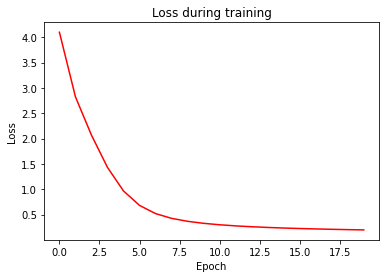

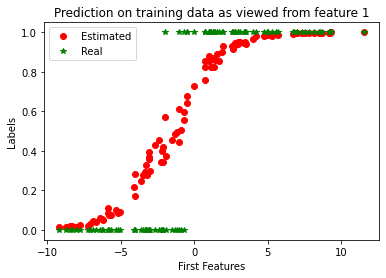

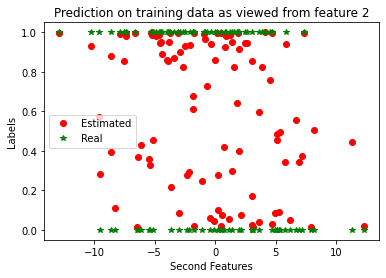

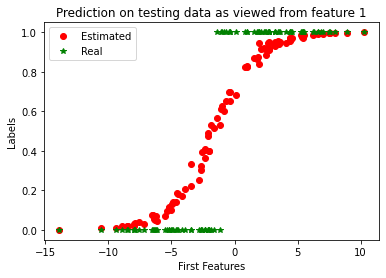

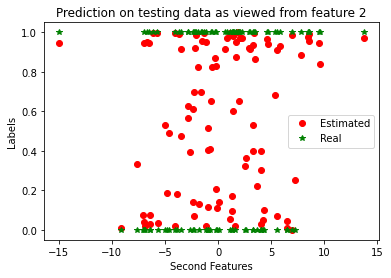

In [18]:
plot(losses)

## Lets look out our weight and bias value after training

In [19]:
print(f'Weight: {weights}')
print(f'Bias: {bias}')

Weight: Parameter containing:
tensor([[ 0.5887],
        [-0.0510]], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([0.9638], device='cuda:0', requires_grad=True)
